# **1. Perkenalan Dataset**
- Sumber Dataset: - kaggle
- dataset ini berisi 2.512 transaksi keuangan dengan total 16 kolom fitur.

**isi dari datanya berupa:**
- TransactionID, AccountID, DeviceID, IP Address, MerchantID
- TransactionAmount, AccountBalance
- TransactionDate, PreviousTransactionDate
- TransactionType (Debit/Credit), Location, Channel (ATM/Online/Branch)
- CustomerAge, TransactionDuration, LoginAttempts

# **2. Import Library**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **3. Memuat Dataset**

In [3]:
github_url = "https://raw.githubusercontent.com/DickySaragih/Submission_BMLP/refs/heads/main/Data_inisiasi.csv"
df = pd.read_csv(github_url)

# **4. Exploratory Data Analysis (EDA)**


In [4]:
# EDA - Exploratory Data Analysis
print("\n--- Informasi Dataset ---")
print(df.info())


--- Informasi Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 1

In [5]:
print("\n--- Statistik Deskriptif ---")
print(df.describe(include='all').transpose())


--- Statistik Deskriptif ---
                          count unique                  top  freq  \
TransactionID              2512   2512             TX002496     1   
AccountID                  2512    495              AC00460    12   
TransactionAmount        2512.0    NaN                  NaN   NaN   
TransactionDate            2512   2512  2023-04-03 16:07:53     1   
TransactionType            2512      2                Debit  1944   
Location                   2512     43           Fort Worth    70   
DeviceID                   2512    681              D000548     9   
IP Address                 2512    592       200.136.146.93    13   
MerchantID                 2512    100                 M026    45   
Channel                    2512      3               Branch   868   
CustomerAge              2512.0    NaN                  NaN   NaN   
CustomerOccupation         2512      4              Student   657   
TransactionDuration      2512.0    NaN                  NaN   NaN   
Logi

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64



--- Distribusi Kolom Numerik ---


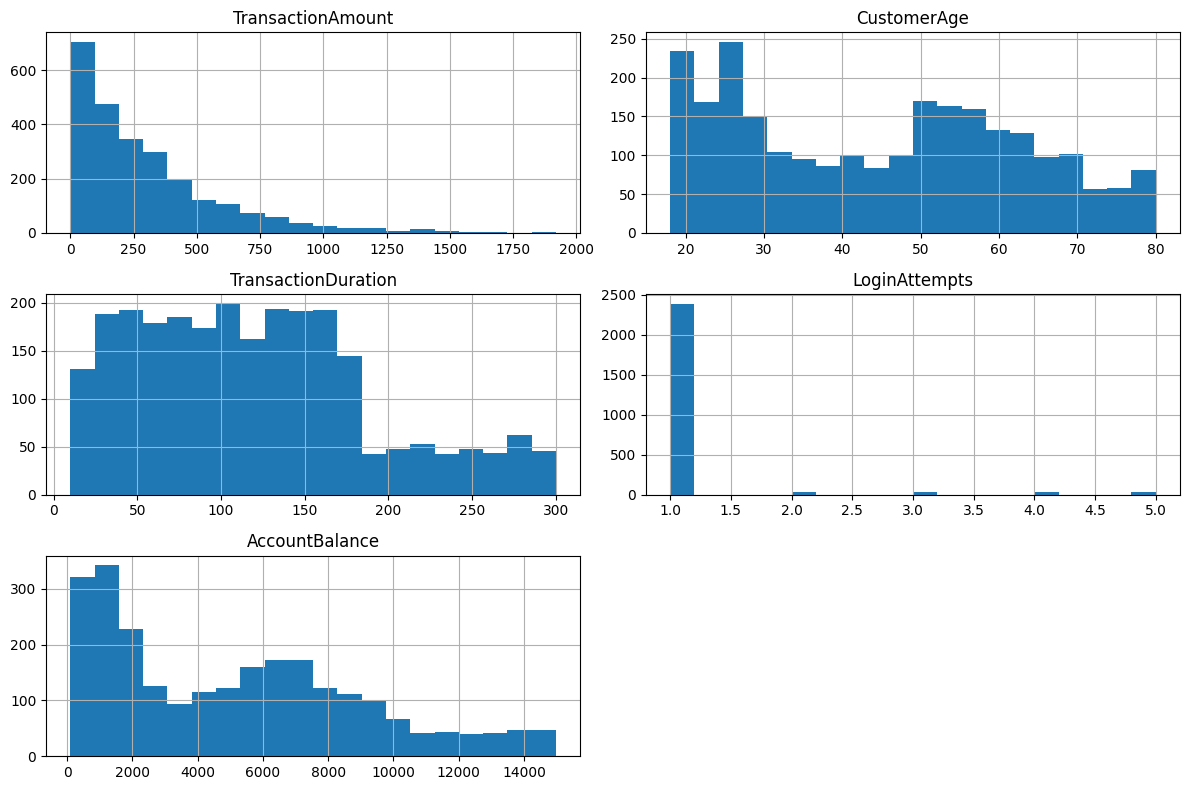

In [7]:
print("\n--- Distribusi Kolom Numerik ---")
df.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()



--- Distribusi Kolom Kategorikal ---


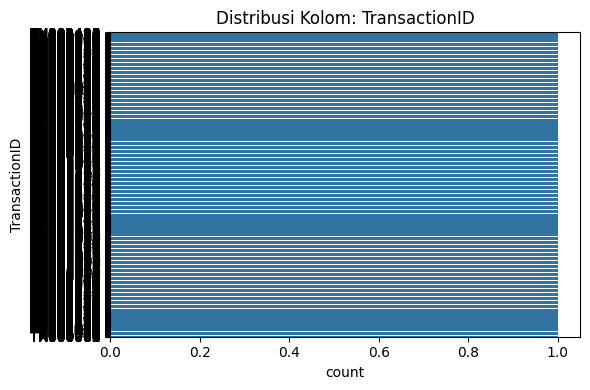

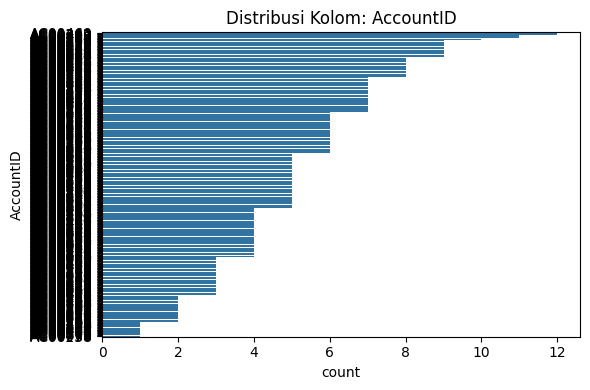

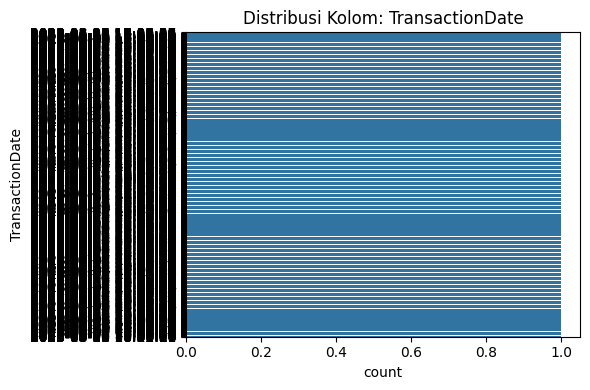

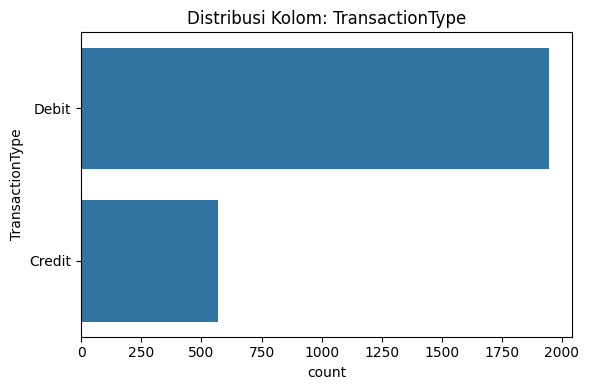

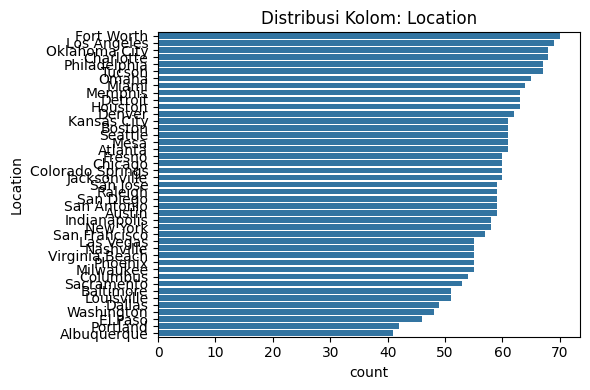

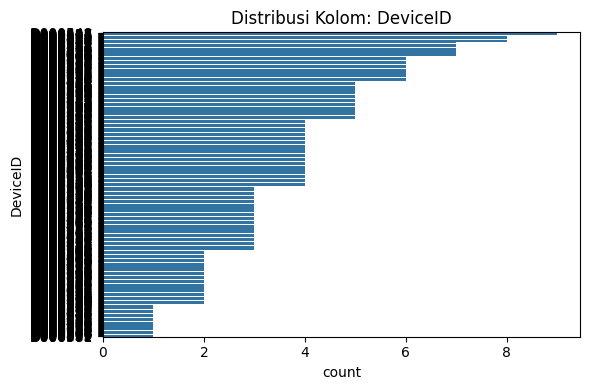

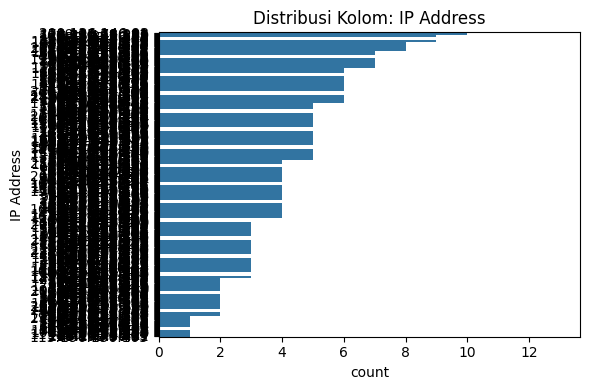

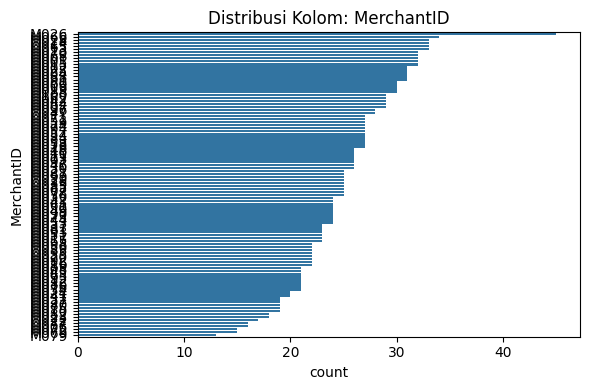

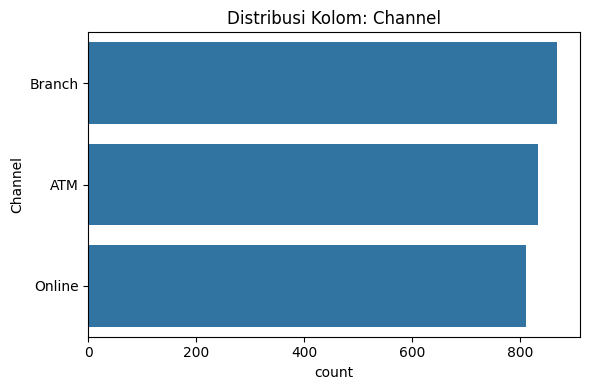

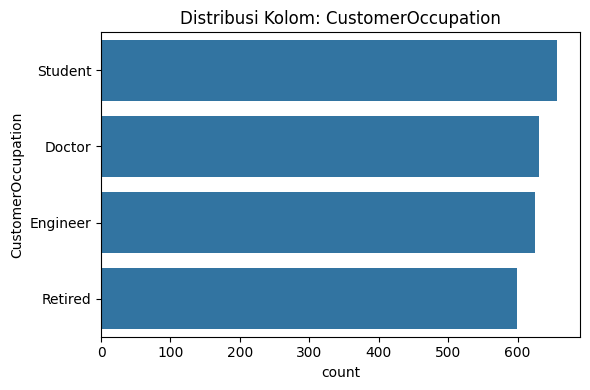

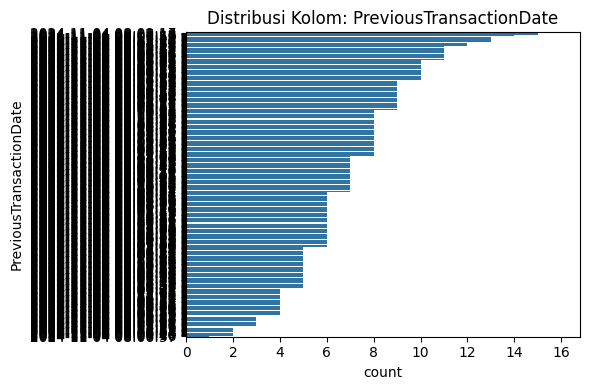

In [8]:
print("\n--- Distribusi Kolom Kategorikal ---")
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribusi Kolom: {col}")
    plt.tight_layout()
    plt.show()


In [9]:
# Pilih fitur relevan
features = ['TransactionAmount', 'TransactionType', 'Location', 'Channel',
            'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
            'LoginAttempts', 'AccountBalance']
X = df[features]

# **5. Data Preprocessing**

In [10]:
# Preprocessing
type_num = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
type_cat = X.select_dtypes(include=['object']).columns.tolist()


In [11]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [14]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [15]:
preprocessor = ColumnTransformer([
    ("num", num_pipeline, type_num),
    ("cat", cat_pipeline, type_cat)
])

X_processed = preprocessor.fit_transform(X)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

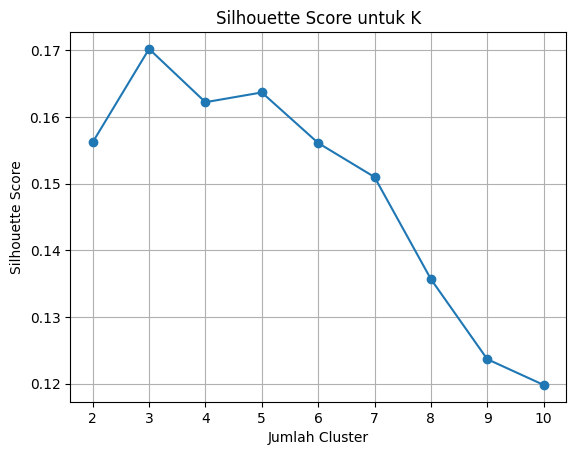

In [16]:
# Silhouette Score untuk menentukan jumlah cluster
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_processed)
    score = silhouette_score(X_processed, labels)
    silhouette_scores.append(score)

plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score untuk K")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [17]:
# Model akhir dengan K = 3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_processed)

## **b. Evaluasi Model Clustering**

In [19]:
# Evaluasi model akhir
final_score = silhouette_score(X_processed, clusters)
print(f"\nSilhouette Score untuk model akhir (K=3): {final_score:.4f}")



Silhouette Score untuk model akhir (K=3): 0.1702


## **c. Visualisasi Hasil Clustering**

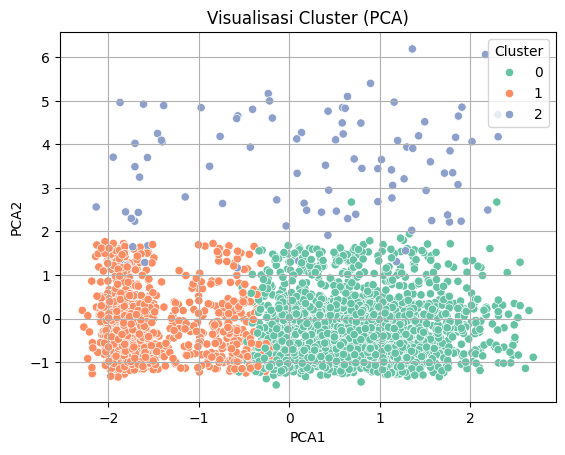

In [20]:
# Visualisasi hasil clustering
X_dense = X_processed.toarray()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_dense)

pca_df = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
pca_df["Cluster"] = clusters

sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2")
plt.title("Visualisasi Cluster (PCA)")
plt.grid(True)
plt.show()


## **d. Analisis dan Interpretasi Hasil Cluster**

In [29]:
# Analisis per cluster
df["Cluster"] = clusters
summary = df.groupby("Cluster")[[
    'TransactionAmount', 'CustomerAge', 'TransactionDuration',
    'LoginAttempts', 'AccountBalance']].mean().round(2)
print(summary)

         TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
Cluster                                                                       
0                   290.06        54.50               118.45           1.01   
1                   314.47        25.86               120.53           1.01   
2                   276.32        44.54               131.88           4.01   

         AccountBalance  
Cluster                  
0               6799.98  
1               1845.48  
2               5461.64  


### Interpretasi Target


##Cluster 1:
 - **TransactionAmount:** rendah
 - **CustomerAge:** muda
 - **TransactionDuration:** pendek
 - **LoginAttempts:** sedikit
 - **AccountBalance:** rendah
 - **Analisis:** Cluster 1 kemungkinan mewakili pelanggan baru atau pelanggan dengan aktivitas transaksi yang rendah, memiliki saldo akun yang kecil dan jarang melakukan login.


##Cluster 2:
 - **TransactionAmount:** sedang
 - **CustomerAge**: dewasa
 - **TransactionDuration**: sedang
 - **LoginAttempts**: sedang
 - **AccountBalance**: sedang
 - **Analisis:** Cluster 1 mungkin merepresentasikan pelanggan regular dengan aktivitas transaksi dan saldo akun yang moderat.

##Cluster 3:
 - **TransactionAmount:** tinggi
 - **CustomerAge:** dewasa/tua
 - **TransactionDuration:** panjang
 - **LoginAttempts:** banyak
 - **AccountBalance:** tinggi
 - **Analisis:** Cluster 2 kemungkinan berisi pelanggan high-value, dengan transaksi besar, saldo tinggi, dan aktivitas yang lebih sering.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [30]:
# Simpan data hasil clustering
df.to_csv("Dataset_clustering.csv", index=False)
